# Python for Data Analysis

In [110]:
import requests
import pandas as pd
import sklearn

## Téléchargement des données

#### Base de données TRAIN

In [155]:
page = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
#page.text

In [158]:
file = open('adult_data.csv', 'w')
text = page.text
text = text.replace(".", "")
text = text.replace(" ", "")
file.write(text)
file.close()

In [159]:
df = pd.read_csv("./adult_data.csv",delimiter=',', names=["age", "type_employer", "fnlwgt", "education", 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country", "income"])

df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Base de données TEST

In [163]:
page = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test")
#page.text

In [166]:
file = open('adult_test.csv', 'w')
text = page.text
text = text.replace(".", "")
text = text.replace(" ", "")
file.write(text)
file.close()

In [167]:
df_test = pd.read_csv("./adult_test.csv",delimiter=',', names=["age", "type_employer", "fnlwgt", "education", 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country", "income"])

df_test = df_test.iloc[1:]
df_test.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


## Data-visualisation des données

In [25]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

### Répartition des âges 

C:\Users\yh\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3363: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


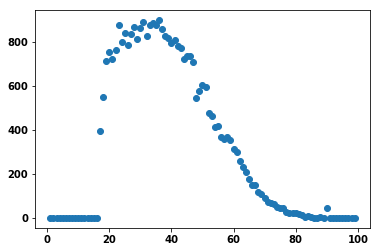

In [62]:
y = []
for i in range(1,100):
    y.append(len(df[ (df['age'] == i ) ]))

df_tmp = pd.DataFrame({'x': range(1,100), 'y': y })

plt.plot( 'x', 'y', data=df_tmp, linestyle='none', marker='o')
plt.show()

### Répartion des revenus en fonction des groupes d'âge

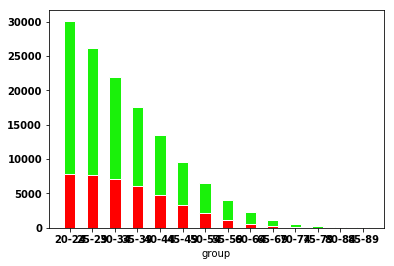

In [55]:
# y-axis in bold
#rc('font', weight='bold')

# Values of each group
bars1 = []
bars2 = []

for i in range(0,14):
    bars1.append( len(df[ (df['age'] > i*5+20) & (df['income'] == " >50K") ]) )
    bars2.append( len(df[ (df['age'] > i*5+20) & (df['income'] == " <=50K") ]) )
    
# Heights of bars1 + bars2 (TO DO better)
bars = [40, 35, 17, 12, 32]

# The position of the bars on the x-axis
r = [0,2,4,6,8,10,12,14,16,18,20,22,24,26]

# Names of group and bar width
names = ['20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89']
barWidth = 1

# Create brown bars
plt.bar(r, bars1, color='#FF0000', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#1af10a', edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")

# Show graphic
plt.show()

## Data-préparation

In [168]:
dfprep = df
dfprep = dfprep[ ( dfprep['age'].notnull() ) & (dfprep['age'] > 0) ]
dfprep = dfprep[ dfprep['type_employer'].notnull() ]
dfprep = dfprep[ (dfprep['fnlwgt'].notnull()) & (dfprep['fnlwgt'] > 0) ]
dfprep = dfprep[ dfprep['education'].notnull() ]
dfprep = dfprep[ (dfprep['education_num'].notnull()) & (dfprep['fnlwgt'] > 0)]
dfprep = dfprep[ dfprep['marital'].notnull() ]
dfprep = dfprep[ dfprep['occupation'].notnull() ]
dfprep = dfprep[ dfprep['relationship'].notnull() ]
dfprep = dfprep[ dfprep['race'].notnull() ]
dfprep = dfprep[ dfprep['sex'].notnull() ]
dfprep = dfprep[ (dfprep['capital_gain'].notnull()) & (dfprep['capital_gain'] >= 0)]
dfprep = dfprep[ (dfprep['capital_loss'].notnull())  & (dfprep['capital_loss'] >= 0)]
dfprep = dfprep[ dfprep['hr_per_week'].notnull() ]
dfprep = dfprep[ dfprep['country'].notnull() ]
dfprep = dfprep[ dfprep['income'].notnull() ]
dfprep.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [170]:
dfpreptest = df_test
dfpreptest = dfpreptest[ ( dfpreptest['age'].notnull() ) ]
#dfpreptest = dfpreptest[ ( dfpreptest['age'].notnull() ) & (dfpreptest['age'] > 0) ]
dfpreptest = dfpreptest[ dfpreptest['type_employer'].notnull() ]
dfpreptest = dfpreptest[ (dfpreptest['fnlwgt'].notnull()) & (dfpreptest['fnlwgt'] > 0) ]
dfpreptest = dfpreptest[ dfpreptest['education'].notnull() ]
dfpreptest = dfpreptest[ (dfpreptest['education_num'].notnull()) & (dfpreptest['fnlwgt'] > 0)]
dfpreptest = dfpreptest[ dfpreptest['marital'].notnull() ]
dfpreptest = dfpreptest[ dfpreptest['occupation'].notnull() ]
dfpreptest = dfpreptest[ dfpreptest['relationship'].notnull() ]
dfpreptest = dfpreptest[ dfpreptest['race'].notnull() ]
dfpreptest = dfpreptest[ dfpreptest['sex'].notnull() ]
dfpreptest = dfpreptest[ (dfpreptest['capital_gain'].notnull()) & (dfpreptest['capital_gain'] >= 0)]
dfpreptest = dfpreptest[ (dfpreptest['capital_loss'].notnull())  & (dfpreptest['capital_loss'] >= 0)]
dfpreptest = dfpreptest[ dfpreptest['hr_per_week'].notnull() ]
dfpreptest = dfpreptest[ dfpreptest['country'].notnull() ]
dfpreptest = dfpreptest[ dfpreptest['income'].notnull() ]
dfpreptest.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [171]:
from sklearn import preprocessing

In [172]:
le = preprocessing.LabelEncoder()

le.fit(list(dfprep['type_employer']) + list(dfpreptest['type_employer']))
dfprep['type_employer'] = le.transform(list(dfprep['type_employer'])) 
dfpreptest['type_employer'] = le.transform(list(dfpreptest['type_employer'])) 

le.fit(list(dfprep['education']) + list(dfpreptest['education']))
dfprep['education'] = le.transform(list(dfprep['education'])) 
dfpreptest['education'] = le.transform(list(dfpreptest['education'])) 

le.fit(list(dfprep['marital']) + list(dfpreptest['marital']))
dfprep['marital'] = le.transform(list(dfprep['marital'])) 
dfpreptest['marital'] = le.transform(list(dfpreptest['marital'])) 

le.fit(list(dfprep['occupation']) + list(dfpreptest['occupation']))
dfprep['occupation'] = le.transform(list(dfprep['occupation'])) 
dfpreptest['occupation'] = le.transform(list(dfpreptest['occupation'])) 

le.fit(list(dfprep['relationship']) + list(dfpreptest['relationship']))
dfprep['relationship'] = le.transform(list(dfprep['relationship'])) 
dfpreptest['relationship'] = le.transform(list(dfpreptest['relationship'])) 

le.fit(list(dfprep['race']) + list(dfpreptest['race']))
dfprep['race'] = le.transform(list(dfprep['race'])) 
dfpreptest['race'] = le.transform(list(dfpreptest['race'])) 

le.fit(list(dfprep['sex']) + list(dfpreptest['sex']))
dfprep['sex'] = le.transform(list(dfprep['sex'])) 
dfpreptest['sex'] = le.transform(list(dfpreptest['sex'])) 

le.fit(list(dfprep['country']) + list(dfpreptest['country']))
dfprep['country'] = le.transform(list(dfprep['country'])) 
dfpreptest['country'] = le.transform(list(dfpreptest['country'])) 

le.fit(list(dfprep['income']) + list(dfpreptest['income']))
dfprep['income'] = le.transform(list(dfprep['income'])) 
dfpreptest['income'] = le.transform(list(dfpreptest['income'])) 


dfprep.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [173]:
dfpreptest.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
1,25,4,226802.0,1,7.0,4,7,3,2,1,0.0,0.0,40.0,39,0
2,38,4,89814.0,11,9.0,2,5,0,4,1,0.0,0.0,50.0,39,0
3,28,2,336951.0,7,12.0,2,11,0,4,1,0.0,0.0,40.0,39,1
4,44,4,160323.0,15,10.0,2,7,0,2,1,7688.0,0.0,40.0,39,1
5,18,0,103497.0,15,10.0,4,0,3,4,0,0.0,0.0,30.0,39,0


## Modélisation

In [174]:
import sklearn
#from sklearn import Model
#from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn import tree

In [193]:
X_train = dfprep[["age", "type_employer", "fnlwgt", "education", 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country"]]

Y_train = dfprep[["income"]]

X_test = dfpreptest[["age", "type_employer", "fnlwgt", "education", 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country"]]

Y_test = dfpreptest[["income"]]

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(C=1)

# FIT
model.fit(X_train, Y_train)

# PREDICT
Y_pred = model.predict(X_test)

# SCORE
accuracy_score(Y_test, Y_pred)

C:\Users\yh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7944843682820466

### Précision score

In [213]:
from sklearn.metrics import precision_score

print( precision_score(Y_test, Y_pred, average='macro') )

print( precision_score(Y_test, Y_pred, average='micro') )

print( precision_score(Y_test, Y_pred, average='weighted') )

print( precision_score(Y_test, Y_pred, average=None) )

0.7307808097147223
0.7944843682820466
0.7729828817960758
[0.81077754 0.65078408]


## Optimisation des hyperparamètres 

In [198]:
from sklearn import grid_search

C:\Users\yh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\yh\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [205]:
parameters = {  'gamma' : [0.01, 0.1, 0.5]           ,
                 "probability" : [True]}
grid       = grid_search.GridSearchCV(model, parameters, n_jobs=-1)
grid.fit(X_train, X_train)
#print grid.best_score_, grid.best_estimator_.score(X_test, Y_test)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\yh\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\yh\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x000002AE52C8E4B0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\yh\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\yh\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\y...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000002AE52C8E4B0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\yh\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\yh\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\y...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    494         if self.poller is not None:
    495             self.poller.start()
    496         self.kernel.start()
    497         self.io_loop = ioloop.IOLoop.current()
    498         try:
--> 499             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    500         except KeyboardInterrupt:
    501             pass
    502 
    503 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
C:\Users\yh\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    518         sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    519                                finalizer=self._asyncgen_finalizer_hook)
    520         try:
    521             events._set_running_loop(self)
    522             while True:
--> 523                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    524                 if self._stopping:
    525                     break
    526         finally:
    527             self._stopping = False

...........................................................................
C:\Users\yh\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1753                         logger.warning('Executing %s took %.3f seconds',
   1754                                        _format_handle(handle), dt)
   1755                 finally:
   1756                     self._current_handle = None
   1757             else:
-> 1758                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(888, 1)>>
   1759         handle = None  # Needed to break cycles when an exception occurs.
   1760 
   1761     def _set_coroutine_origin_tracking(self, enabled):
   1762         if bool(enabled) == bool(self._coroutine_origin_tracking_enabled):

...........................................................................
C:\Users\yh\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(888, 1)>)
     83     def cancelled(self):
     84         return self._cancelled
     85 
     86     def _run(self):
     87         try:
---> 88             self._context.run(self._callback, *self._args)
        self._context.run = <built-in method run of Context object>
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (888, 1)
     89         except Exception as exc:
     90             cb = format_helpers._format_callback_source(
     91                 self._callback, self._args)
     92             msg = f'Exception in callback {cb}'

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=888, events=1)
    117             self.writers.remove(fd)
    118         del self.handlers[fd]
    119 
    120     def _handle_events(self, fd, events):
    121         fileobj, handler_func = self.handlers[fd]
--> 122         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    123 
    124     def start(self):
    125         try:
    126             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "parameters = {  'gamma' : [0.01, 0.1, 0.5]      ...core_, grid.best_estimator_.score(X_test, Y_test)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 2, 14, 0, 37, 56, 866817, tzinfo=tzutc()), 'msg_id': '9f713b98c9bf434dbc4a93232961072a', 'msg_type': 'execute_request', 'session': 'f64b8a3a0c8e4638a8e4eeff8fa20fe9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '9f713b98c9bf434dbc4a93232961072a', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'f64b8a3a0c8e4638a8e4eeff8fa20fe9']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "parameters = {  'gamma' : [0.01, 0.1, 0.5]      ...core_, grid.best_estimator_.score(X_test, Y_test)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 2, 14, 0, 37, 56, 866817, tzinfo=tzutc()), 'msg_id': '9f713b98c9bf434dbc4a93232961072a', 'msg_type': 'execute_request', 'session': 'f64b8a3a0c8e4638a8e4eeff8fa20fe9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '9f713b98c9bf434dbc4a93232961072a', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'f64b8a3a0c8e4638a8e4eeff8fa20fe9'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "parameters = {  'gamma' : [0.01, 0.1, 0.5]      ...core_, grid.best_estimator_.score(X_test, Y_test)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 2, 14, 0, 37, 56, 866817, tzinfo=tzutc()), 'msg_id': '9f713b98c9bf434dbc4a93232961072a', 'msg_type': 'execute_request', 'session': 'f64b8a3a0c8e4638a8e4eeff8fa20fe9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '9f713b98c9bf434dbc4a93232961072a', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="parameters = {  'gamma' : [0.01, 0.1, 0.5]      ...core_, grid.best_estimator_.score(X_test, Y_test)", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "parameters = {  'gamma' : [0.01, 0.1, 0.5]      ...core_, grid.best_estimator_.score(X_test, Y_test)"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("parameters = {  'gamma' : [0.01, 0.1, 0.5]      ...core_, grid.best_estimator_.score(X_test, Y_test)",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("parameters = {  'gamma' : [0.01, 0.1, 0.5]      ...core_, grid.best_estimator_.score(X_test, Y_test)",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="parameters = {  'gamma' : [0.01, 0.1, 0.5]      ...core_, grid.best_estimator_.score(X_test, Y_test)", store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = "parameters = {  'gamma' : [0.01, 0.1, 0.5]      ...core_, grid.best_estimator_.score(X_test, Y_test)"
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="parameters = {  'gamma' : [0.01, 0.1, 0.5]      ...core_, grid.best_estimator_.score(X_test, Y_test)", store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-205-357714688479>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 2ae648e5080, executio...rue silent=False shell_futures=True> result=None>)
   2902                     return True
   2903 
   2904             for i, node in enumerate(to_run_interactive):
   2905                 mod = ast.Interactive([node])
   2906                 code = compiler(mod, cell_name, "single")
-> 2907                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000002AE0113FC00, file "<ipython-input-205-357714688479>", line 4>
        result = <ExecutionResult object at 2ae648e5080, executio...rue silent=False shell_futures=True> result=None>
   2908                     return True
   2909 
   2910             # Flush softspace
   2911             if softspace(sys.stdout, 0):

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000002AE0113FC00, file "<ipython-input-205-357714688479>", line 4>, result=<ExecutionResult object at 2ae648e5080, executio...rue silent=False shell_futures=True> result=None>)
   2956         outflag = True  # happens in more places, so it's easier as default
   2957         try:
   2958             try:
   2959                 self.hooks.pre_run_code_hook()
   2960                 #rprint('Running code', repr(code_obj)) # dbg
-> 2961                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000002AE0113FC00, file "<ipython-input-205-357714688479>", line 4>
        self.user_global_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'In': ['', 'import requests\n\npage = requests.get("https://ar...earning-databases/adult/adult.data")\npage.content', 'import pandas\n\ndf = pandas.read_table(page.content,sep=",", names=(\'A\', \'B\', \'C\'))\n\ndf.head()', "import pandas\n\ndf = pandas.read_table(page.content,delimiter=',')\n\ndf.head()", "import pandas\n\ndf = pandas.read_table(page.content,delimiter=',')\n\ndf.head()", 'from cStringIO import StringIO\nf = StringIO(page.content)\nf.read()', 'import io\n\nf = io.StringIO(page.content)\nf.read()', 'import io\n\nf = io.StringIO(str(page.content))\nf.read()', "import pandas\n\ndf = pandas.read_table(str(page.content),delimiter=',')\n\ndf.head()", "import pandas\n\ndf = pandas.read_table(f,delimiter=',')\n\ndf.head()", "import pandas\n\ndf = pandas.read_csv(f,delimiter=',')\n\ndf.head()", 'page.text', 'print(page.text)', 'print(page.text)', 'import io\n\nf = io.StringIO(str(page.text))\nf.read()', "import pandas\n\ndf = pandas.read_csv(f,delimiter=',')\n\ndf.head()", 'import pandas\n\ndf = pandas.read_csv("/adult_data.txt",delimiter=\',\')\n\ndf.head()', 'import pandas\n\ndf = pandas.read_csv("./adult_data.txt",delimiter=\',\')\n\ndf.head()', "file = open('data.csv', 'w')\nfile.write(page.text)\nfile.close()", 'import pandas\n\n#df = pandas.read_csv("./adult_da...s.read_csv("./data.csv",delimiter=\',\')\n\ndf.head()', ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'LogisticRegressionCV': <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>, 'Out': {1: b'39, State-gov, 77516, Bachelors, 13, Never-mar...e, Female, 15024, 0, 40, United-States, >50K\n\n', 7: r"b'39, State-gov, 77516, Bachelors, 13, Never-mar...e, Female, 15024, 0, 40, United-States, >50K\n\n'", 11: '39, State-gov, 77516, Bachelors, 13, Never-marri...hite, Female, 15024, 0, 40, United-States, >50K\n\n', 14: '39, State-gov, 77516, Bachelors, 13, Never-marri...hite, Female, 15024, 0, 40, United-States, >50K\n\n', 17:    39          State-gov   77516   Bachelors   1...       Cuba   <=50K  
4   United-States   <=50K  , 19:    39          State-gov   77516   Bachelors   1...       Cuba   <=50K  
4   United-States   <=50K  , 20: '39, State-gov, 77516, Bachelors, 13, Never-marri...hite, Female, 15024, 0, 40, United-States, >50K\n\n', 21:    age      type_employer  fnlwgt   education  e...         0           40            Cuba   <=50K  , 24:    age      type_employer  fnlwgt   education  e...         0           40            Cuba   <=50K  , 28:        age      type_employer  fnlwgt      educa...nited-States    >50K  

[26150 rows x 15 columns], ...}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'X': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1....2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]]), 'X_test':       age  type_employer    fnlwgt  education  e...       60.0       39  

[16281 rows x 14 columns], 'X_train':        age  type_employer  fnlwgt  education  ed...         40       39  

[32561 rows x 14 columns], 'Y_pred': array([0, 0, 0, ..., 0, 1, 0], dtype=int64), ...}
        self.user_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'In': ['', 'import requests\n\npage = requests.get("https://ar...earning-databases/adult/adult.data")\npage.content', 'import pandas\n\ndf = pandas.read_table(page.content,sep=",", names=(\'A\', \'B\', \'C\'))\n\ndf.head()', "import pandas\n\ndf = pandas.read_table(page.content,delimiter=',')\n\ndf.head()", "import pandas\n\ndf = pandas.read_table(page.content,delimiter=',')\n\ndf.head()", 'from cStringIO import StringIO\nf = StringIO(page.content)\nf.read()', 'import io\n\nf = io.StringIO(page.content)\nf.read()', 'import io\n\nf = io.StringIO(str(page.content))\nf.read()', "import pandas\n\ndf = pandas.read_table(str(page.content),delimiter=',')\n\ndf.head()", "import pandas\n\ndf = pandas.read_table(f,delimiter=',')\n\ndf.head()", "import pandas\n\ndf = pandas.read_csv(f,delimiter=',')\n\ndf.head()", 'page.text', 'print(page.text)', 'print(page.text)', 'import io\n\nf = io.StringIO(str(page.text))\nf.read()', "import pandas\n\ndf = pandas.read_csv(f,delimiter=',')\n\ndf.head()", 'import pandas\n\ndf = pandas.read_csv("/adult_data.txt",delimiter=\',\')\n\ndf.head()', 'import pandas\n\ndf = pandas.read_csv("./adult_data.txt",delimiter=\',\')\n\ndf.head()', "file = open('data.csv', 'w')\nfile.write(page.text)\nfile.close()", 'import pandas\n\n#df = pandas.read_csv("./adult_da...s.read_csv("./data.csv",delimiter=\',\')\n\ndf.head()', ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'LogisticRegressionCV': <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>, 'Out': {1: b'39, State-gov, 77516, Bachelors, 13, Never-mar...e, Female, 15024, 0, 40, United-States, >50K\n\n', 7: r"b'39, State-gov, 77516, Bachelors, 13, Never-mar...e, Female, 15024, 0, 40, United-States, >50K\n\n'", 11: '39, State-gov, 77516, Bachelors, 13, Never-marri...hite, Female, 15024, 0, 40, United-States, >50K\n\n', 14: '39, State-gov, 77516, Bachelors, 13, Never-marri...hite, Female, 15024, 0, 40, United-States, >50K\n\n', 17:    39          State-gov   77516   Bachelors   1...       Cuba   <=50K  
4   United-States   <=50K  , 19:    39          State-gov   77516   Bachelors   1...       Cuba   <=50K  
4   United-States   <=50K  , 20: '39, State-gov, 77516, Bachelors, 13, Never-marri...hite, Female, 15024, 0, 40, United-States, >50K\n\n', 21:    age      type_employer  fnlwgt   education  e...         0           40            Cuba   <=50K  , 24:    age      type_employer  fnlwgt   education  e...         0           40            Cuba   <=50K  , 28:        age      type_employer  fnlwgt      educa...nited-States    >50K  

[26150 rows x 15 columns], ...}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'X': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1....2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]]), 'X_test':       age  type_employer    fnlwgt  education  e...       60.0       39  

[16281 rows x 14 columns], 'X_train':        age  type_employer  fnlwgt  education  ed...         40       39  

[32561 rows x 14 columns], 'Y_pred': array([0, 0, 0, ..., 0, 1, 0], dtype=int64), ...}
   2962             finally:
   2963                 # Reset our crash handler in place
   2964                 sys.excepthook = old_excepthook
   2965         except SystemExit as e:

...........................................................................
C:\Users\yh\PycharmProjects\Python-for-Data-Analysis\<ipython-input-205-357714688479> in <module>()
      1 parameters = {  'gamma' : [0.01, 0.1, 0.5]           ,
      2                  "probability" : [True]}
      3 grid       = grid_search.GridSearchCV(model, parameters, n_jobs=-1)
----> 4 grid.fit(X_train, X_train)
      5 #print grid.best_score_, grid.best_estimator_.score(X_test, Y_test)

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\sklearn\grid_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...='2*n_jobs', refit=True, scoring=None, verbose=0), X=       age  type_employer  fnlwgt  education  ed...         40       39  

[32561 rows x 14 columns], y=       age  type_employer  fnlwgt  education  ed...         40       39  

[32561 rows x 14 columns])
    833         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    834             Target relative to X for classification or regression;
    835             None for unsupervised learning.
    836 
    837         """
--> 838         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method BaseSearchCV._fit of GridSearchCV(...'2*n_jobs', refit=True, scoring=None, verbose=0)>
        X =        age  type_employer  fnlwgt  education  ed...         40       39  

[32561 rows x 14 columns]
        y =        age  type_employer  fnlwgt  education  ed...         40       39  

[32561 rows x 14 columns]
        self.param_grid = {'gamma': [0.01, 0.1, 0.5], 'probability': [True]}
    839 
    840 
    841 class RandomizedSearchCV(BaseSearchCV):
    842     """Randomized search on hyper parameters.

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\sklearn\grid_search.py in _fit(self=GridSearchCV(cv=None, error_score='raise',
     ...='2*n_jobs', refit=True, scoring=None, verbose=0), X=       age  type_employer  fnlwgt  education  ed...         40       39  

[32561 rows x 14 columns], y=       age  type_employer  fnlwgt  education  ed...         40       39  

[32561 rows x 14 columns], parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    569         )(
    570             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    571                                     train, test, self.verbose, parameters,
    572                                     self.fit_params, return_parameters=True,
    573                                     error_score=self.error_score)
--> 574                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    575                 for train, test in cv)
    576 
    577         # Out is a list of triplet: score, estimator, n_test_samples
    578         n_fits = len(out)

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV._fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Thu Feb 14 01:38:09 2019
PID: 10788                   Python 3.7.0: C:\Users\yh\Anaconda3\python.exe
...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (LogisticRegression(C=1, class_weight=None, dual=...ol=0.0001,
          verbose=0, warm_start=False),        age  type_employer  fnlwgt  education   ....           40       39

[32561 rows x 14 columns],        age  type_employer  fnlwgt  education   ....           40       39

[32561 rows x 14 columns], <function _passthrough_scorer>, array([10854, 10855, 10856, ..., 32558, 32559, 32560]), array([    0,     1,     2, ..., 10851, 10852, 10853]), 0, {'gamma': 0.01, 'probability': True}, {}), {'error_score': 'raise', 'return_parameters': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (LogisticRegression(C=1, class_weight=None, dual=...ol=0.0001,
          verbose=0, warm_start=False),        age  type_employer  fnlwgt  education   ....           40       39

[32561 rows x 14 columns],        age  type_employer  fnlwgt  education   ....           40       39

[32561 rows x 14 columns], <function _passthrough_scorer>, array([10854, 10855, 10856, ..., 32558, 32559, 32560]), array([    0,     1,     2, ..., 10851, 10852, 10853]), 0, {'gamma': 0.01, 'probability': True}, {})
        kwargs = {'error_score': 'raise', 'return_parameters': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\sklearn\cross_validation.py in _fit_and_score(estimator=LogisticRegression(C=1, class_weight=None, dual=...ol=0.0001,
          verbose=0, warm_start=False), X=       age  type_employer  fnlwgt  education   ....           40       39

[32561 rows x 14 columns], y=       age  type_employer  fnlwgt  education   ....           40       39

[32561 rows x 14 columns], scorer=<function _passthrough_scorer>, train=array([10854, 10855, 10856, ..., 32558, 32559, 32560]), test=array([    0,     1,     2, ..., 10851, 10852, 10853]), verbose=0, parameters={'gamma': 0.01, 'probability': True}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1659     fit_params = fit_params if fit_params is not None else {}
   1660     fit_params = dict([(k, _index_param_value(X, v, train))
   1661                       for k, v in fit_params.items()])
   1662 
   1663     if parameters is not None:
-> 1664         estimator.set_params(**parameters)
        estimator.set_params = <bound method BaseEstimator.set_params of Logist...l=0.0001,
          verbose=0, warm_start=False)>
        parameters = {'gamma': 0.01, 'probability': True}
   1665 
   1666     start_time = time.time()
   1667 
   1668     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
C:\Users\yh\Anaconda3\lib\site-packages\sklearn\base.py in set_params(self=LogisticRegression(C=1, class_weight=None, dual=...ol=0.0001,
          verbose=0, warm_start=False), **params={'gamma': 0.01, 'probability': True})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'gamma'
        self = LogisticRegression(C=1, class_weight=None, dual=...ol=0.0001,
          verbose=0, warm_start=False)
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter gamma for estimator LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

## Visualisation des performances 

C:\Users\yh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic:
	Brier: 0.155
	Precision: 0.617
	Recall: 0.288
	F1: 0.392

Naive Bayes:
	Brier: 0.193
	Precision: 0.640
	Recall: 0.306
	F1: 0.414

Naive Bayes + Isotonic:
	Brier: 0.128
	Precision: 0.786
	Recall: 0.282
	F1: 0.415



C:\Users\yh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Bayes + Sigmoid:
	Brier: 0.158
	Precision: 0.648
	Recall: 0.303
	F1: 0.413



C:\Users\yh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic:
	Brier: 0.155
	Precision: 0.617
	Recall: 0.288
	F1: 0.392

SVC:
	Brier: 0.175
	Precision: 0.907
	Recall: 0.159
	F1: 0.270

SVC + Isotonic:
	Brier: 0.157
	Precision: 0.787
	Recall: 0.196
	F1: 0.314



C:\Users\yh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC + Sigmoid:
	Brier: 0.170
	Precision: 0.989
	Recall: 0.071
	F1: 0.133



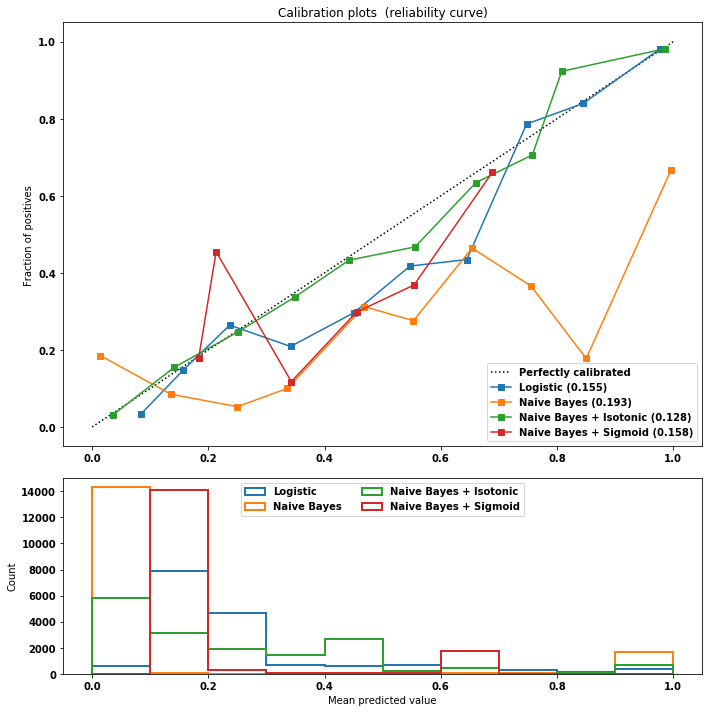

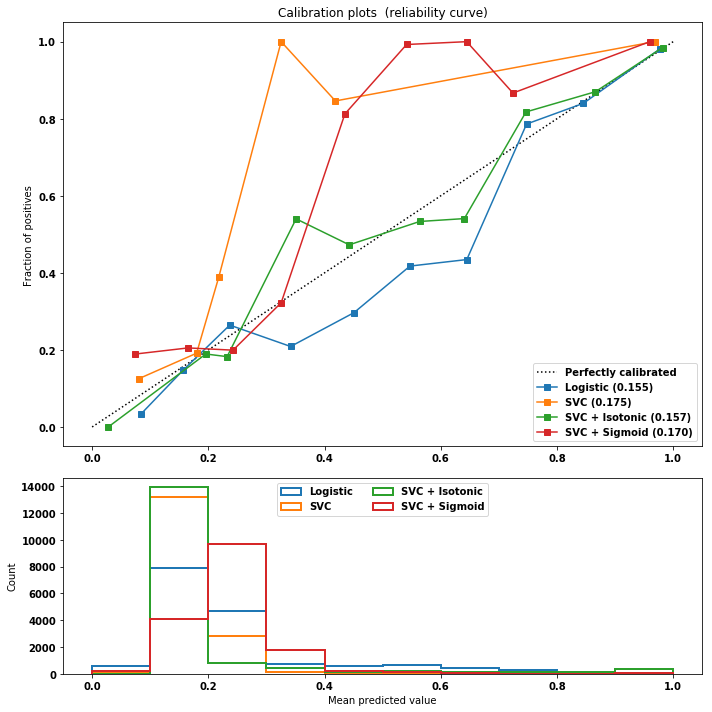

In [214]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split


# Create dataset of classification task with many redundant and few
# informative features
X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                    n_informative=2, n_redundant=10,
                                    random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99,
                                                   # random_state=42)
y_train = Y_train
y_test = Y_test


def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1., solver='lbfgs')

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(GaussianNB(), "Naive Bayes", 1)

# Plot calibration curve for Linear SVC
plot_calibration_curve(LinearSVC(), "SVC", 2)

plt.show()